# Data Science Nigeria 2019 Challenge: Insurance Prediction

## Problem Statement 

Recently, there has been an increase in the number of building collapse in Lagos and major cities in Nigeria. Olusola Insurance Company offers a building insurance policy that protects buildings against damages that could be caused by a fire or vandalism, by a flood or storm.

You have been appointed as the Lead Data Analyst to build a predictive model to determine if a building will have an insurance claim during a certain period or not. You will have to predict the probability of having at least one claim over the insured period of the building.

The model will be based on the building characteristics. The target variable, Claim, is a:

1 if the building has at least a claim over the insured period.

0 if the building doesn’t have a claim over the insured period.

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Import Data**

The data can be downloaded on Zindi's competition site:https://zindi.africa/competitions/data-science-nigeria-2019-challenge-1-insurance-prediction/data

In [38]:
train = pd.read_csv('/Users/lukabeverin/Documents/Zindi/Nigeria Insurance/train_data.csv')
variables = pd.read_csv('/Users/lukabeverin/Documents/Zindi/Nigeria Insurance/VariableDescription.csv')

# Explatory Data Analysis 

Let's explore the variable descriptions.

In [44]:
variables.head()

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."


And now the data set.

In [4]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


Set the index to Customer Id

In [5]:
train = train.set_index('Customer Id')

By calling the shape attribute of the train dataset we observe that there are 7160 observations and 14 columns in the data set

In [16]:
train.shape

(7160, 14)

Now we identify the data types of the 14 columns and add it to a dictionary. We then identify missing values of the columns and add the stats to the datadict. Next we identify number of unique values for each column. Also, identify the count for each variable. Finally, rename the 0 column in the datadict.

In [6]:
#Data types
datadict = pd.DataFrame(train.dtypes)
#Missing values
datadict['MissingVal'] = train.isnull().sum()
#Unique values
datadict['NUnique']=train.nunique()
#Count of variable
datadict['Count']=train.count()
#Rename 0 to datatype
datadict = datadict.rename(columns={0:'DataType'})
datadict

,DataType,MissingVal,NUnique,Count
YearOfObservation,int64,0,5,7160
Insured_Period,float64,0,401,7160
Residential,int64,0,2,7160
Building_Painted,object,0,2,7160
Building_Fenced,object,0,2,7160
Garden,object,7,2,7153
Settlement,object,0,2,7160
Building Dimension,float64,106,2043,7054
Building_Type,int64,0,4,7160
Date_of_Occupancy,float64,508,134,6652


Having **missing values** in a dataset can cause errors with some machine learning algorithms and either the rows that has missing values should be removed or imputed 
Imputing refers to using a model to replace missing values.

There are many options we could consider when replacing a missing value, for example:

1) constant value that has meaning within the domain, such as 0, distinct from all other values.

2) value from another randomly selected record.

3) mean, median or mode value for the column.

4) value estimated by another predictive model.

The columns Garden, Building dimension, Date_of_Occupancy and Geo_code have missing values. The 7 missing values from the Garden col are likely to human error and data handling errors. For example, the form given out by the insurance company might not have been clear enough about the description of a 'garden', or customers simply just did not enter this data. We suspect that the missing values from the other columns are due to lack of information from this customers side. Regardless, customers should know the geographical area of their residence. Some form of geo-location technology could help with data capturing with respect to geo codes. It would not be a surprise that many customers do not know their building dimesions or date of occupancy. These values could be replaced by the mean or meadian value for the column. 

## Descriptive Statistics

Discriptive statistics of **object** datatypes

In [25]:
train.describe(include=['object'])

,Building_Painted,Building_Fenced,Garden,Settlement,NumberOfWindows,Geo_Code
count,7160,7160,7153,7160,7160,7058
unique,2,2,2,2,11,1307
top,V,N,O,R,.,6088
freq,5382,3608,3602,3610,3551,143


Discriptive statistics of **value/number** datatypes

In [26]:
train.describe(include=['number'])

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


## Univariate Data Analysis

Let's analyse the **number of claims** in the test data set

In [27]:
train.Claim.value_counts(normalize=True)

0    0.771788
1    0.228212
Name: Claim, dtype: float64

22.82% of customers had at least a claim over the insured period whilst 77.18% did not claim over the insured period.

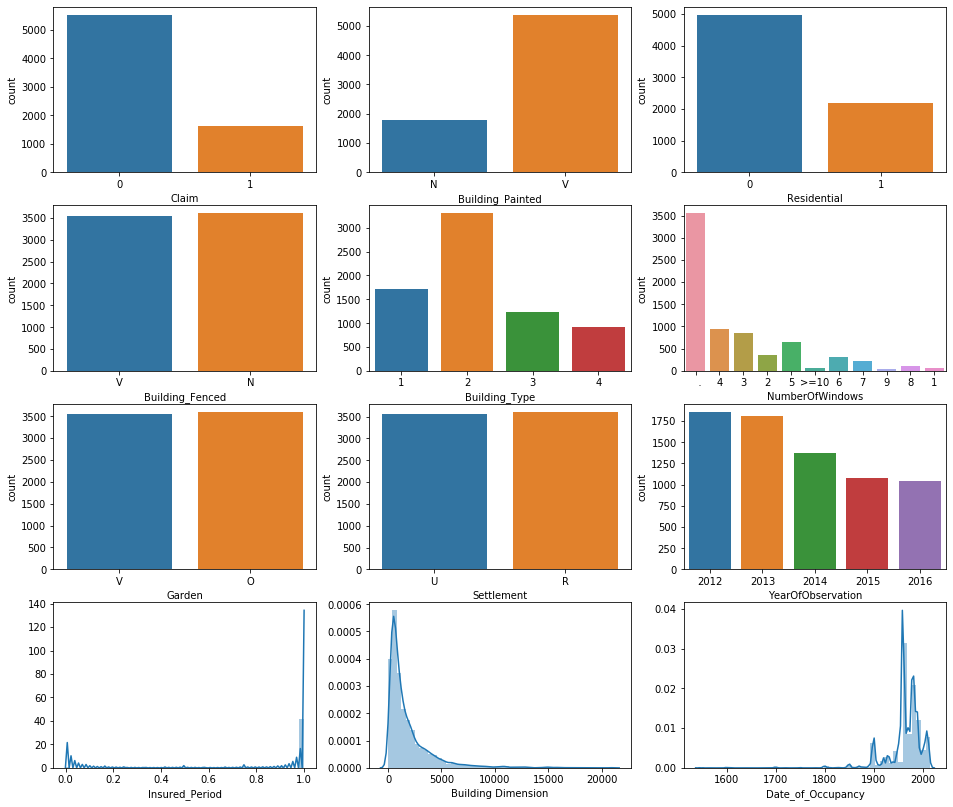

In [83]:
fig, axes = plt.subplots(4, 3, figsize=(16, 14))
# Object data types (categorical)
sns.countplot('Claim',data=train,ax=axes[0,0])
sns.countplot('Building_Painted',data=train,ax=axes[0,1])
sns.countplot('Residential',data=train,ax=axes[0,2])
sns.countplot('Building_Fenced',data=train,ax=axes[1,0])
sns.countplot('Building_Type',data=train,ax=axes[1,1])
sns.countplot('NumberOfWindows',data=train,ax=axes[1,2])
sns.countplot('Garden',data=train,ax=axes[2,0])
sns.countplot('Settlement',data=train,ax=axes[2,1])
sns.countplot('YearOfObservation',data=train,ax=axes[2,2])
# Value data types (continious)
sns.distplot(train['Insured_Period'].dropna(), kde=True,ax=axes[3,0])
sns.distplot(train['Building Dimension'].dropna(),kde=True,ax=axes[3,1])
sns.distplot(train['Date_of_Occupancy'].dropna(),kde=True,ax=axes[3,2])

### Label Encoding

In order for our machine algorithm to perform well we need to transform our categorical daya into data that the trees can understand. Label encoding assigns ordinal integer to different categorical levels of categorical variable.

We perform label encoding on the columns 'Building_Painted', 'Building_Fenced', 'Settlement', 'Garden' and 'Geo_Code.

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 

for column in train[['Building_Painted','Building_Fenced','Settlement','Garden','Geo_Code']]:
    train[column] = lb.fit_transform(train[column])

# Treat Missing Values

For the **'Garden'** and **'Geo_Code'** columns, we remove rows that have missing values.

In [7]:
train = train.dropna(axis=0, subset=['Garden','Geo_Code'])

The **'Building Dimension'** column does not have many outliers so we can use the mean value for missing value imputation.

In [9]:
train['Building Dimension'].fillna(train['Building Dimension'].mean(),inplace=True)

The **'Date_of_occupancy'** column does not have a stable distributin. We use the median value for missing value imputation.

In [10]:
train['Date_of_Occupancy'].fillna(train['Date_of_Occupancy'].median(),inplace=True)

Let's quickly check if we have correctly handled all the missing values in the dataset.

In [24]:
datadict_new = pd.DataFrame(train.dtypes)
datadict_new['MissingVal'] = train.isnull().sum()
datadict_new = datadict_new.rename(columns={0:'DataType'})
datadict_new

,DataType,MissingVal
YearOfObservation,int64,0
Insured_Period,float64,0
Residential,int64,0
Building_Painted,int64,0
Building_Fenced,int64,0
Garden,int64,0
Settlement,int64,0
Building Dimension,float64,0
Building_Type,int64,0
Date_of_Occupancy,float64,0


## Some more data cleaning

In the **'NumberOfWindows'** col we should change '.' to '0'.

In [ ]:
train['NumberOfWindows'] = train['NumberOfWindows'].str.replace('.','0')

We notice that the column 'NumberOfWindows' has a variable with '>=10'. During the data acquisition phase we should be more clear with our inputs. Since there are very few houses with more than 10 windows, we will include all windows more than 10 into the value of 10. This is not a very accurate method because we do not have enough information about houses with more than 10 windows. However, this data cleaning method is required for the machine learning algorithm.

In [ ]:
train['NumberOfWindows'] = train['NumberOfWindows'].map(lambda x: x.lstrip('>='))
train['NumberOfWindows']= train['NumberOfWindows'].astype(str).astype(int)

## Plot the data once again

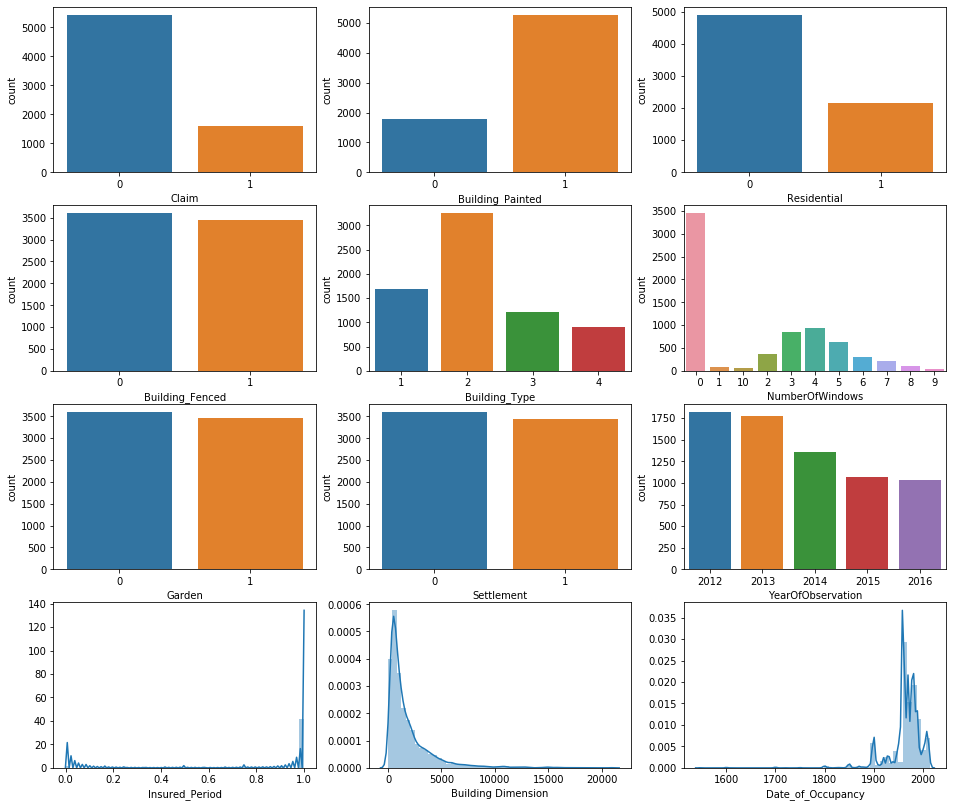

In [21]:
fig, axes = plt.subplots(4, 3, figsize=(16, 14))
# Object data types (categorical)
sns.countplot('Claim',data=train,ax=axes[0,0])
sns.countplot('Building_Painted',data=train,ax=axes[0,1])
sns.countplot('Residential',data=train,ax=axes[0,2])
sns.countplot('Building_Fenced',data=train,ax=axes[1,0])
sns.countplot('Building_Type',data=train,ax=axes[1,1])
sns.countplot('NumberOfWindows',data=train,ax=axes[1,2])
sns.countplot('Garden',data=train,ax=axes[2,0])
sns.countplot('Settlement',data=train,ax=axes[2,1])
sns.countplot('YearOfObservation',data=train,ax=axes[2,2])
# Value data types (continious)
sns.distplot(train['Insured_Period'].dropna(), kde=True,ax=axes[3,0])
sns.distplot(train['Building Dimension'].dropna(),kde=True,ax=axes[3,1])
sns.distplot(train['Date_of_Occupancy'].dropna(),kde=True,ax=axes[3,2])

## Bivariate Data Analysis

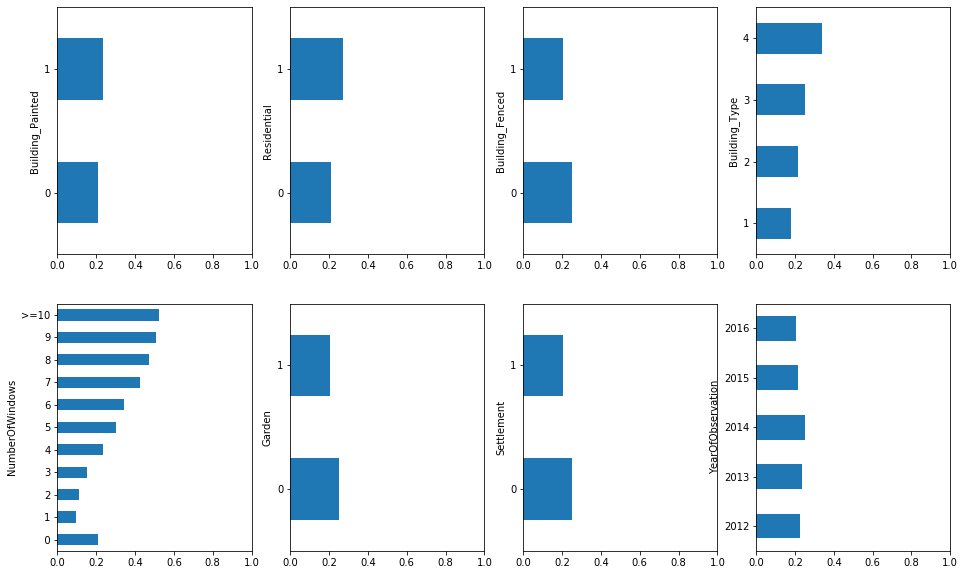

In [14]:
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
train.groupby('Building_Painted')['Claim'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
train.groupby('Residential')['Claim'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
train.groupby('Building_Fenced')['Claim'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
train.groupby('Building_Type')['Claim'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
train.groupby('NumberOfWindows')['Claim'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
train.groupby('Garden')['Claim'].mean().plot(kind='barh',ax=axesbi[1,1],xlim=[0,1])
train.groupby('Settlement')['Claim'].mean().plot(kind='barh',ax=axesbi[1,2],xlim=[0,1])
train.groupby('YearOfObservation')['Claim'].mean().plot(kind='barh',ax=axesbi[1,3],xlim=[0,1])

Most variables seem evenly distributed amongst claims and no claims. However, we notice that for there is a a strong relationship between the number of windows and claims. Furthermore, Building type 4 has ever so slightly more claims than than the other building types.

## Correlation Heatmap of continuous variables

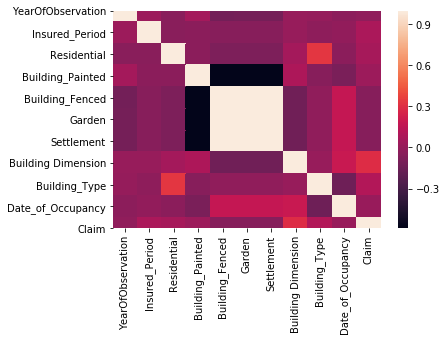

In [15]:
import seaborn as sns

corr = train.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [16]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Claim
YearOfObservation,1,0.029,-0.039,0.06,-0.12,-0.12,-0.12,0.009,0.006,-0.029,-0.015
Insured_Period,0.029,1,-0.039,-0.036,-0.045,-0.045,-0.045,0.0072,-0.022,-0.0089,0.087
Residential,-0.039,-0.039,1,-0.034,-0.086,-0.085,-0.086,0.057,0.33,-0.034,0.064
Building_Painted,0.06,-0.036,-0.034,1,-0.59,-0.59,-0.59,0.092,-0.046,-0.096,0.031
Building_Fenced,-0.12,-0.045,-0.086,-0.59,1,1,1,-0.13,-0.018,0.18,-0.051
Garden,-0.12,-0.045,-0.085,-0.59,1,1,1,-0.13,-0.018,0.18,-0.051
Settlement,-0.12,-0.045,-0.086,-0.59,1,1,1,-0.13,-0.018,0.18,-0.051
Building Dimension,0.009,0.0072,0.057,0.092,-0.13,-0.13,-0.13,1,0.0079,0.2,0.3
Building_Type,0.006,-0.022,0.33,-0.046,-0.018,-0.018,-0.018,0.0079,1,-0.14,0.11
Date_of_Occupancy,-0.029,-0.0089,-0.034,-0.096,0.18,0.18,0.18,0.2,-0.14,1,0.017


There are a strong positive correlations between the Building_Fenced, Garden and Settlement variables. This checks out with intuition, for example, if a building has a garden it most likely has a fence and vice versa.

# XGBoost algorithm

### What is XGBoost?

**XGBoost** stands for **Extreme Gradient Boosting**. XGBoost is a powerful machine learning algorithm that is dominating the world of applied machine learning and Kaggle competitions. It is an implementation of gradient boosted trees designed for speed and accuracy.

XGBoost belongs to a family of boosting algorithms. It uses the gradient boosting (GBM) framework at its core. So, first of all we should know about gradient boosting.


#### Gradient boosting

Gradient boosting is a supervised machine learning algorithm, which tries to predict a target variable by combining the estimates of a set of simpler, weaker models. In boosting, the trees are built in a sequential manner such that each subsequent tree aims to reduce the errors of the previous tree. The misclassified labels are given higher weights. Each tree learns from its predecessors and tries to reduce the residual errors. So, the tree next in sequence will learn from the previous tree residuals.

#### XGBoost

In XGBoost, we try to fit a model on the gradient of the loss function generated from the previous step. So, in XGBoost we modified our gradient boosting algorithm so that it works with any differentiable loss function.



### XGBoost installation

In [45]:
import xgboost as xgb

### Declare feature vectors and target variable¶

In [28]:
# Feature variables 
X = train.drop('Claim', axis=1) 

# Target variable
y = train['Claim']

Next we convert the dataset into an optimized data structure called **Dmatrix** which XGBoost supports and gives it acclaimed performance and efficiency gains. 

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

### Split data into separate training and test set

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Train XGBoost 

Before running XGBoost, we must set three types of parameters: general parameters, booster parameters and task parameters.

-**General parameters** relate to which booster we are using to do boosting, commonly tree or linear model

-**Booster parameters** depend on which booster you have chosen

-**Learning task parameters** decide on the learning scenario. For example, regression tasks may use different parameters with ranking tasks.

-**Command line parameters** relate to behavior of CLI version of XGBoost.

More information about XGBoost parameters can be found at: https://xgboost.readthedocs.io/en/latest/parameter.html

For the **Learning Task Parameter** we choose the binary:logistic learning objective which is a  logistic regression for binary classification. It outputs probability.

For the **Parameters of the Tree Booster** we set max_depth (Maximum depth of a tree) = 4. Increasing this value will make the model more complex and more likely to overfit. Also we set alpha = 10, which is the L1 regularization term on weights. Increasing alpha will make the model more conservative. Next we set the learning_rate/eta = 1. Step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features, and eta shrinks the feature weights to make the boosting process more conservative. Finally we set n_estimators = 110. It is the number of trees we want to build.

In [69]:
# Import XGBClassifier
from xgboost import XGBClassifier


# Declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 5,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':110
        }
            
            
            
# Instantiate the classifier 
xgb_clf = XGBClassifier(**params)



# Fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=1.0, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=110, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Make Predictions
Make predictions on our test data.

In [70]:
y_pred = xgb_clf.predict(X_test)

## Check the Accuracy Score

In [71]:
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.7391


We can see that XGBoost obtains an accuracy score of **73.91%**

In [77]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i.imgur.com/dcc6Gsmh.jpg", width=320, height=320)

To imporve the accuracy we could investigate the possibility of tuning the other hyperparameters. **Hyperparamter tuning** can be done with the use of the cv function from XGBoost. It allows us to run k-fold cross-validation on our training dataset and can return various validation metrics.

## Feature Importance 

XGBoost provides a way to examine the importance of each feature in the original dataset within the model. It involves counting the number of times each feature is split on across all boosting trees in the model. Then we visualize the result as a bar graph, with the features ordered according to how many times they appear.

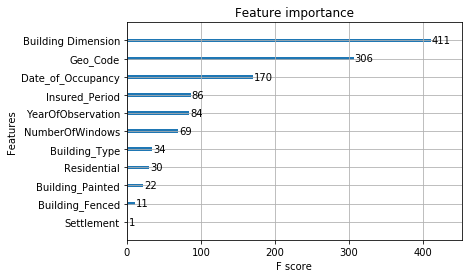

In [37]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

Notably, the Building dimension is the most import feature with location coming in second. The date of occupancy is also a relatively important feature.

More data cleaning could be done in the future, for example we did not have a look at outliers in the data. We suspect there to be outliers in the building dimension variable.

###### Notebook completed by Luka Beverin